In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('naukri_cleaned.csv')

In [3]:
df.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range
0,Persistent,data scientist,ML Engineer,WFO,Kolkata,"May 28,2023",May,2023-06-26,5-12 Yrs,5.0,12.0,Not disclosed
1,Oprable Inc,data scientist,Data Scientist,WFO,Kolkata,"June 24,2023",June,2023-06-26,0-1 Yrs,0.0,1.0,Not disclosed
2,Dreambig It Solutions India,data scientist,Data Scientist,WFO,Noida,"June 27,2023",June,2023-06-26,1-6 Yrs,1.0,6.0,Not disclosed
3,Axtria,data scientist,Data Analyst,Hybrid,Noida,"June 08,2023",June,2023-06-26,4-9 Yrs,4.0,9.0,Not disclosed
4,Evalueserve,data scientist,Data Scientist,Hybrid,Gurugram,"June 08,2023",June,2023-06-26,7-10 Yrs,7.0,10.0,Not disclosed


In [4]:
df.shape

(4000, 12)

###### Making a copy of origininal data 

In [5]:
job_listings = df.copy()

### Analysis

1. Number of job for each title.
2. Which Location as highest job.
3. Number of jobs a location has for certain title.*
4. Average experience required for each title.
5. Experience level for each job title.
6. Work modes count for each title.
7. Averge Salary Range for each title.


## 1. Number of Jobs 
# ==============

In [6]:
job_listings.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range
0,Persistent,data scientist,ML Engineer,WFO,Kolkata,"May 28,2023",May,2023-06-26,5-12 Yrs,5.0,12.0,Not disclosed
1,Oprable Inc,data scientist,Data Scientist,WFO,Kolkata,"June 24,2023",June,2023-06-26,0-1 Yrs,0.0,1.0,Not disclosed
2,Dreambig It Solutions India,data scientist,Data Scientist,WFO,Noida,"June 27,2023",June,2023-06-26,1-6 Yrs,1.0,6.0,Not disclosed
3,Axtria,data scientist,Data Analyst,Hybrid,Noida,"June 08,2023",June,2023-06-26,4-9 Yrs,4.0,9.0,Not disclosed
4,Evalueserve,data scientist,Data Scientist,Hybrid,Gurugram,"June 08,2023",June,2023-06-26,7-10 Yrs,7.0,10.0,Not disclosed


In [7]:
# Title count

pd.DataFrame(job_listings['Title'].value_counts()).head(20)

,Title
Data Scientist,1352
Data Analyst,1020
ML Engineer,765
ML Ops,278
AI Ops,133
Data Engineer,109
Deep Learning Engineer,46
Deputy area manager - b2c underwriting rural,28
"Hiring freshers /experience for global mnc for hr , accounts finance,",24
Deputy area manager - b2c underwriting,14


###### The following job title are of our interest:
_1.Data Scientist_

_2.Data Analyst_

_3.ML Engineer_

_4.ML Ops_

_5.AI Ops_

_6.Data Engineer_

_7.Deep Learning Engineer_

_8.Python Developer_

_9.Software Engineer_

In [8]:
job_titles = ['Data Scientist','Data Analyst','Data Engineer','ML Engineer','Deep Learning Engineer',
              'AI Engineer','ML Ops','Python Developer','Software Engineer']

job_listings = df[df['Title'].isin(job_titles)]

In [9]:
job_listings.shape

(3595, 12)

######  405 jobs were not matching the desired titles

###  1.1 Number of Vacancies w.r.t Titles 

In [10]:
# Title count

pd.DataFrame(job_listings['Title'].value_counts())

,Title
Data Scientist,1352
Data Analyst,1020
ML Engineer,765
ML Ops,278
Data Engineer,109
Deep Learning Engineer,46
Python Developer,13
Software Engineer,12


In [11]:
jobs = list(pd.DataFrame(job_listings['Title'].value_counts()).index)

In [12]:
jobs

['Data Scientist',
 'Data Analyst',
 'ML Engineer',
 'ML Ops',
 'Data Engineer',
 'Deep Learning Engineer',
 'Python Developer',
 'Software Engineer']

In [13]:
records = []

for job in jobs:
    title = job
    vacancies = job_listings[(job_listings['Title']==job)]
    records.append([title,vacancies.shape[0]])

In [14]:
headers = ['Title','Vacancies']

title_vacancies = pd.DataFrame(records,columns=headers)

In [15]:
title_vacancies = title_vacancies.sort_values(by='Vacancies',ascending=True)

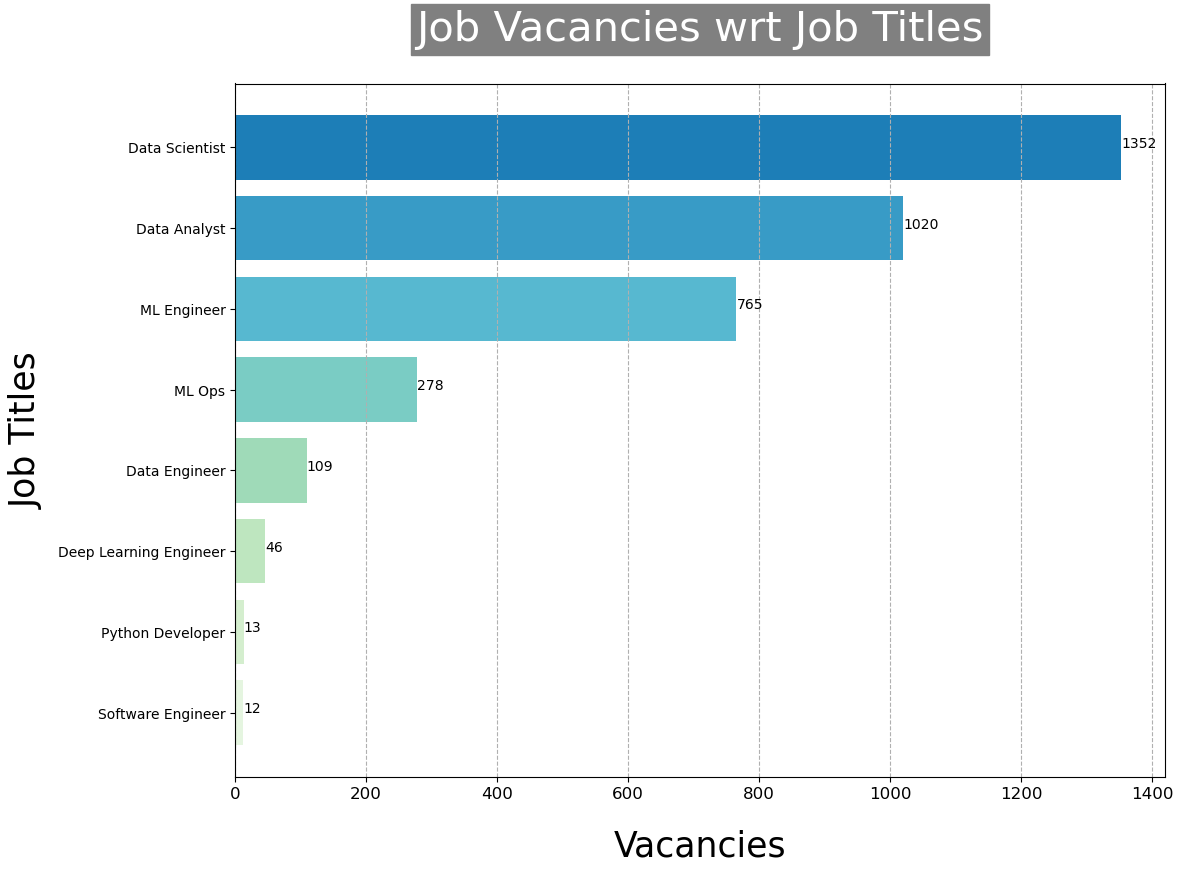

In [16]:
#=============================================================================================================================#
#=========================================  DEFINING A COLORMAP  =============================================================#
#=============================================================================================================================#

# Define a colormap
colormap = plt.cm.get_cmap('GnBu')
values = np.arange(10,100,10)

# Normalize the values to range between 0 and 1
normalize = plt.Normalize(vmin=0, vmax=100)

# Create an array of normalized values
normalized_values = normalize(values)

#=============================================================================================================================#
#============================================  PLOTTING GRAPH  ===============================================================#
#=============================================================================================================================#


plt.figure(figsize=(12,9))

plt.title('Job Vacancies wrt Job Titles',fontsize=30,y=1.05,color='white',backgroundcolor='grey')

bars = plt.barh(title_vacancies['Title'],title_vacancies['Vacancies'],color=colormap(normalized_values))

for bar in bars:
    width = bar.get_width()
    height = bar.get_height()
    y_axis = bar.get_y()
    plt.text(x=width+0.3,y=y_axis+height/2,s=int(width))
    
plt.grid(axis='x',ls='--')
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
plt.ylabel('Job Titles',fontsize=25,labelpad=10)
plt.xlabel('Vacancies',fontsize=25,labelpad=20)


plt.show()

###  1.1 Number of Vacancies w.r.t Location

In [17]:
location_df = pd.DataFrame(job_listings['Location'].value_counts()).head(10)

In [18]:
locations = list(location_df.index)

In [19]:
location_df

,Location
Bengaluru,926
Gurugram,472
Hyderabad,372
Mumbai,350
Noida,247
Delhi,212
Chennai,206
Pune,199
Remote,170
Kolkata,155


In [20]:
records = []

for loc in locations:
    location= loc
    vacancies = job_listings[(job_listings['Location']==loc)]
    records.append([location,vacancies.shape[0]])
    
headers = ['Location','Vacancies']

location_vacancies = pd.DataFrame(records,columns=headers)
location_vacancies = location_vacancies.sort_values(by='Vacancies',ascending=True)

In [21]:
location_vacancies

,Location,Vacancies
9,Kolkata,155
8,Remote,170
7,Pune,199
6,Chennai,206
5,Delhi,212
4,Noida,247
3,Mumbai,350
2,Hyderabad,372
1,Gurugram,472
0,Bengaluru,926


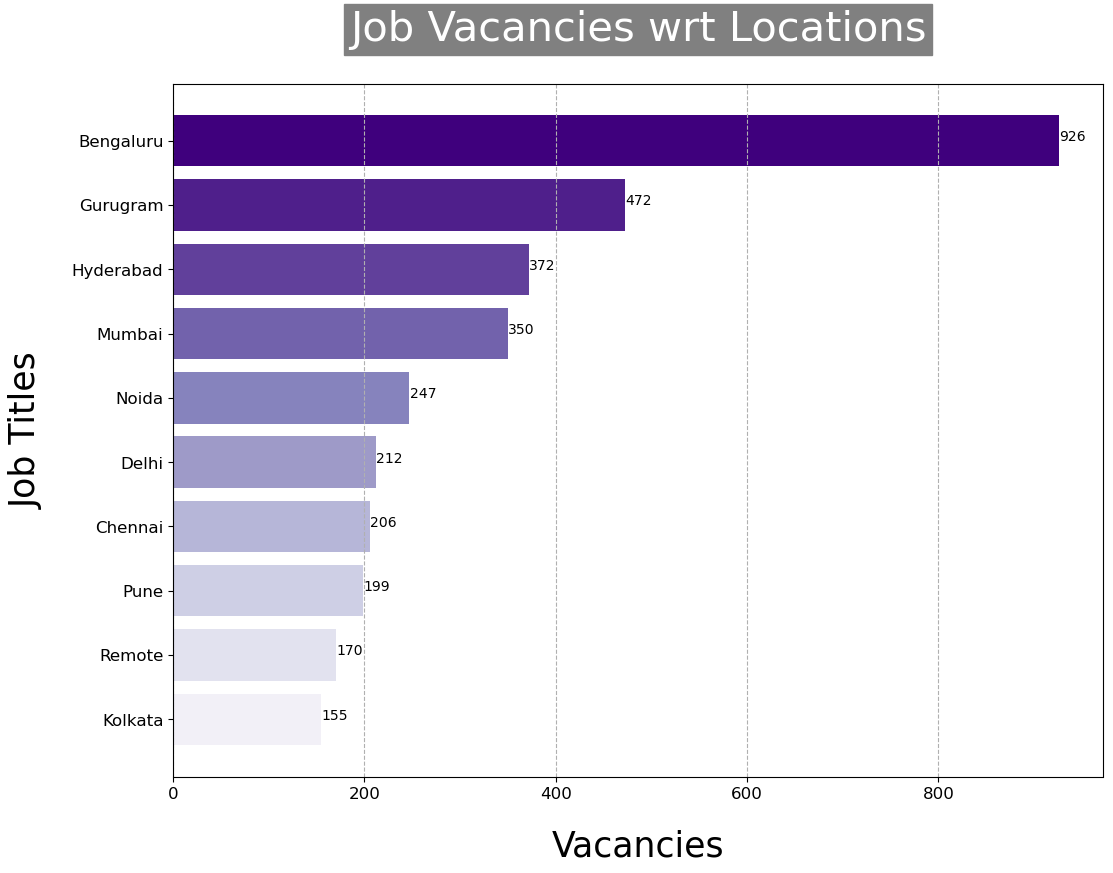

In [22]:
#=============================================================================================================================#
#=========================================  DEFINING A COLORMAP  =============================================================#
#=============================================================================================================================#

# Define a colormap
colormap = plt.cm.get_cmap('Purples')
values = np.arange(10,110,10)

# Normalize the values to range between 0 and 1
normalize = plt.Normalize(vmin=0, vmax=100)

# Create an array of normalized values
normalized_values = normalize(values)

#=============================================================================================================================#
#============================================  PLOTTING GRAPH  ===============================================================#
#=============================================================================================================================#


plt.figure(figsize=(12,9))

plt.title('Job Vacancies wrt Locations',fontsize=30,y=1.05,color='white',backgroundcolor='grey')

bars = plt.barh(location_vacancies['Location'],location_vacancies['Vacancies'],color=colormap(normalized_values))

for bar in bars:
    width = bar.get_width()
    height = bar.get_height()
    y_axis = bar.get_y()
    plt.text(x=width+0.3,y=y_axis+height/2,s=int(width),fontsize=10)

    
plt.grid(axis='x',ls='--')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Job Titles',fontsize=25,labelpad=20)
plt.xlabel('Vacancies',fontsize=25,labelpad=20)

plt.show()

# =============
                   
## 2. Experience         
                               
# =============

### 2.1 Vacancies based on Experience Level for Each Title 

In [23]:
job_listings.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range
0,Persistent,data scientist,ML Engineer,WFO,Kolkata,"May 28,2023",May,2023-06-26,5-12 Yrs,5.0,12.0,Not disclosed
1,Oprable Inc,data scientist,Data Scientist,WFO,Kolkata,"June 24,2023",June,2023-06-26,0-1 Yrs,0.0,1.0,Not disclosed
2,Dreambig It Solutions India,data scientist,Data Scientist,WFO,Noida,"June 27,2023",June,2023-06-26,1-6 Yrs,1.0,6.0,Not disclosed
3,Axtria,data scientist,Data Analyst,Hybrid,Noida,"June 08,2023",June,2023-06-26,4-9 Yrs,4.0,9.0,Not disclosed
4,Evalueserve,data scientist,Data Scientist,Hybrid,Gurugram,"June 08,2023",June,2023-06-26,7-10 Yrs,7.0,10.0,Not disclosed


##### Experince Levels
            
    0-2 ==>  Entry Level
    2-4 ==>  Associate
    4-8 ==>  Mid Level
    8+  ==>  Executive

In [24]:
def get_experience_level(row):
    if row['Minimum_experience'] == 0 : #and row['Maximum_experience'] <= 2:
        return 'Entry level'
    elif row['Maximum_experience'] <= 4.0: #row['Minimum_experience'] >= 2.0 and 
        return 'Associate'
    elif row['Maximum_experience'] <= 8: #row['Minimum_experience'] >= 5 and 
        return 'Mid level'
    else:
        return 'Executive'

In [25]:
job_listings['Experience_level'] = job_listings.apply(get_experience_level,axis=1)

In [26]:
# Title count

pd.DataFrame(job_listings['Experience_level'].value_counts()).head(20)

,Experience_level
Mid level,1752
Executive,1096
Associate,486
Entry level,261


In [27]:
pivot_table_explevel = pd.pivot_table(job_listings, values='Organization', index='Title', columns='Experience_level', aggfunc='count')
pivot_table_explevel = pivot_table_explevel.sort_values(by='Title',ascending=False)

In [28]:
pivot_table_explevel

Experience_level,Associate,Entry level,Executive,Mid level
Title,,,,
Software Engineer,NaN,7.0,3.0,2.0
Python Developer,NaN,3.0,3.0,7.0
ML Ops,113.0,28.0,90.0,47.0
ML Engineer,69.0,32.0,247.0,417.0
Deep Learning Engineer,1.0,6.0,20.0,19.0
Data Scientist,93.0,82.0,533.0,644.0
Data Engineer,5.0,13.0,53.0,38.0
Data Analyst,205.0,90.0,147.0,578.0


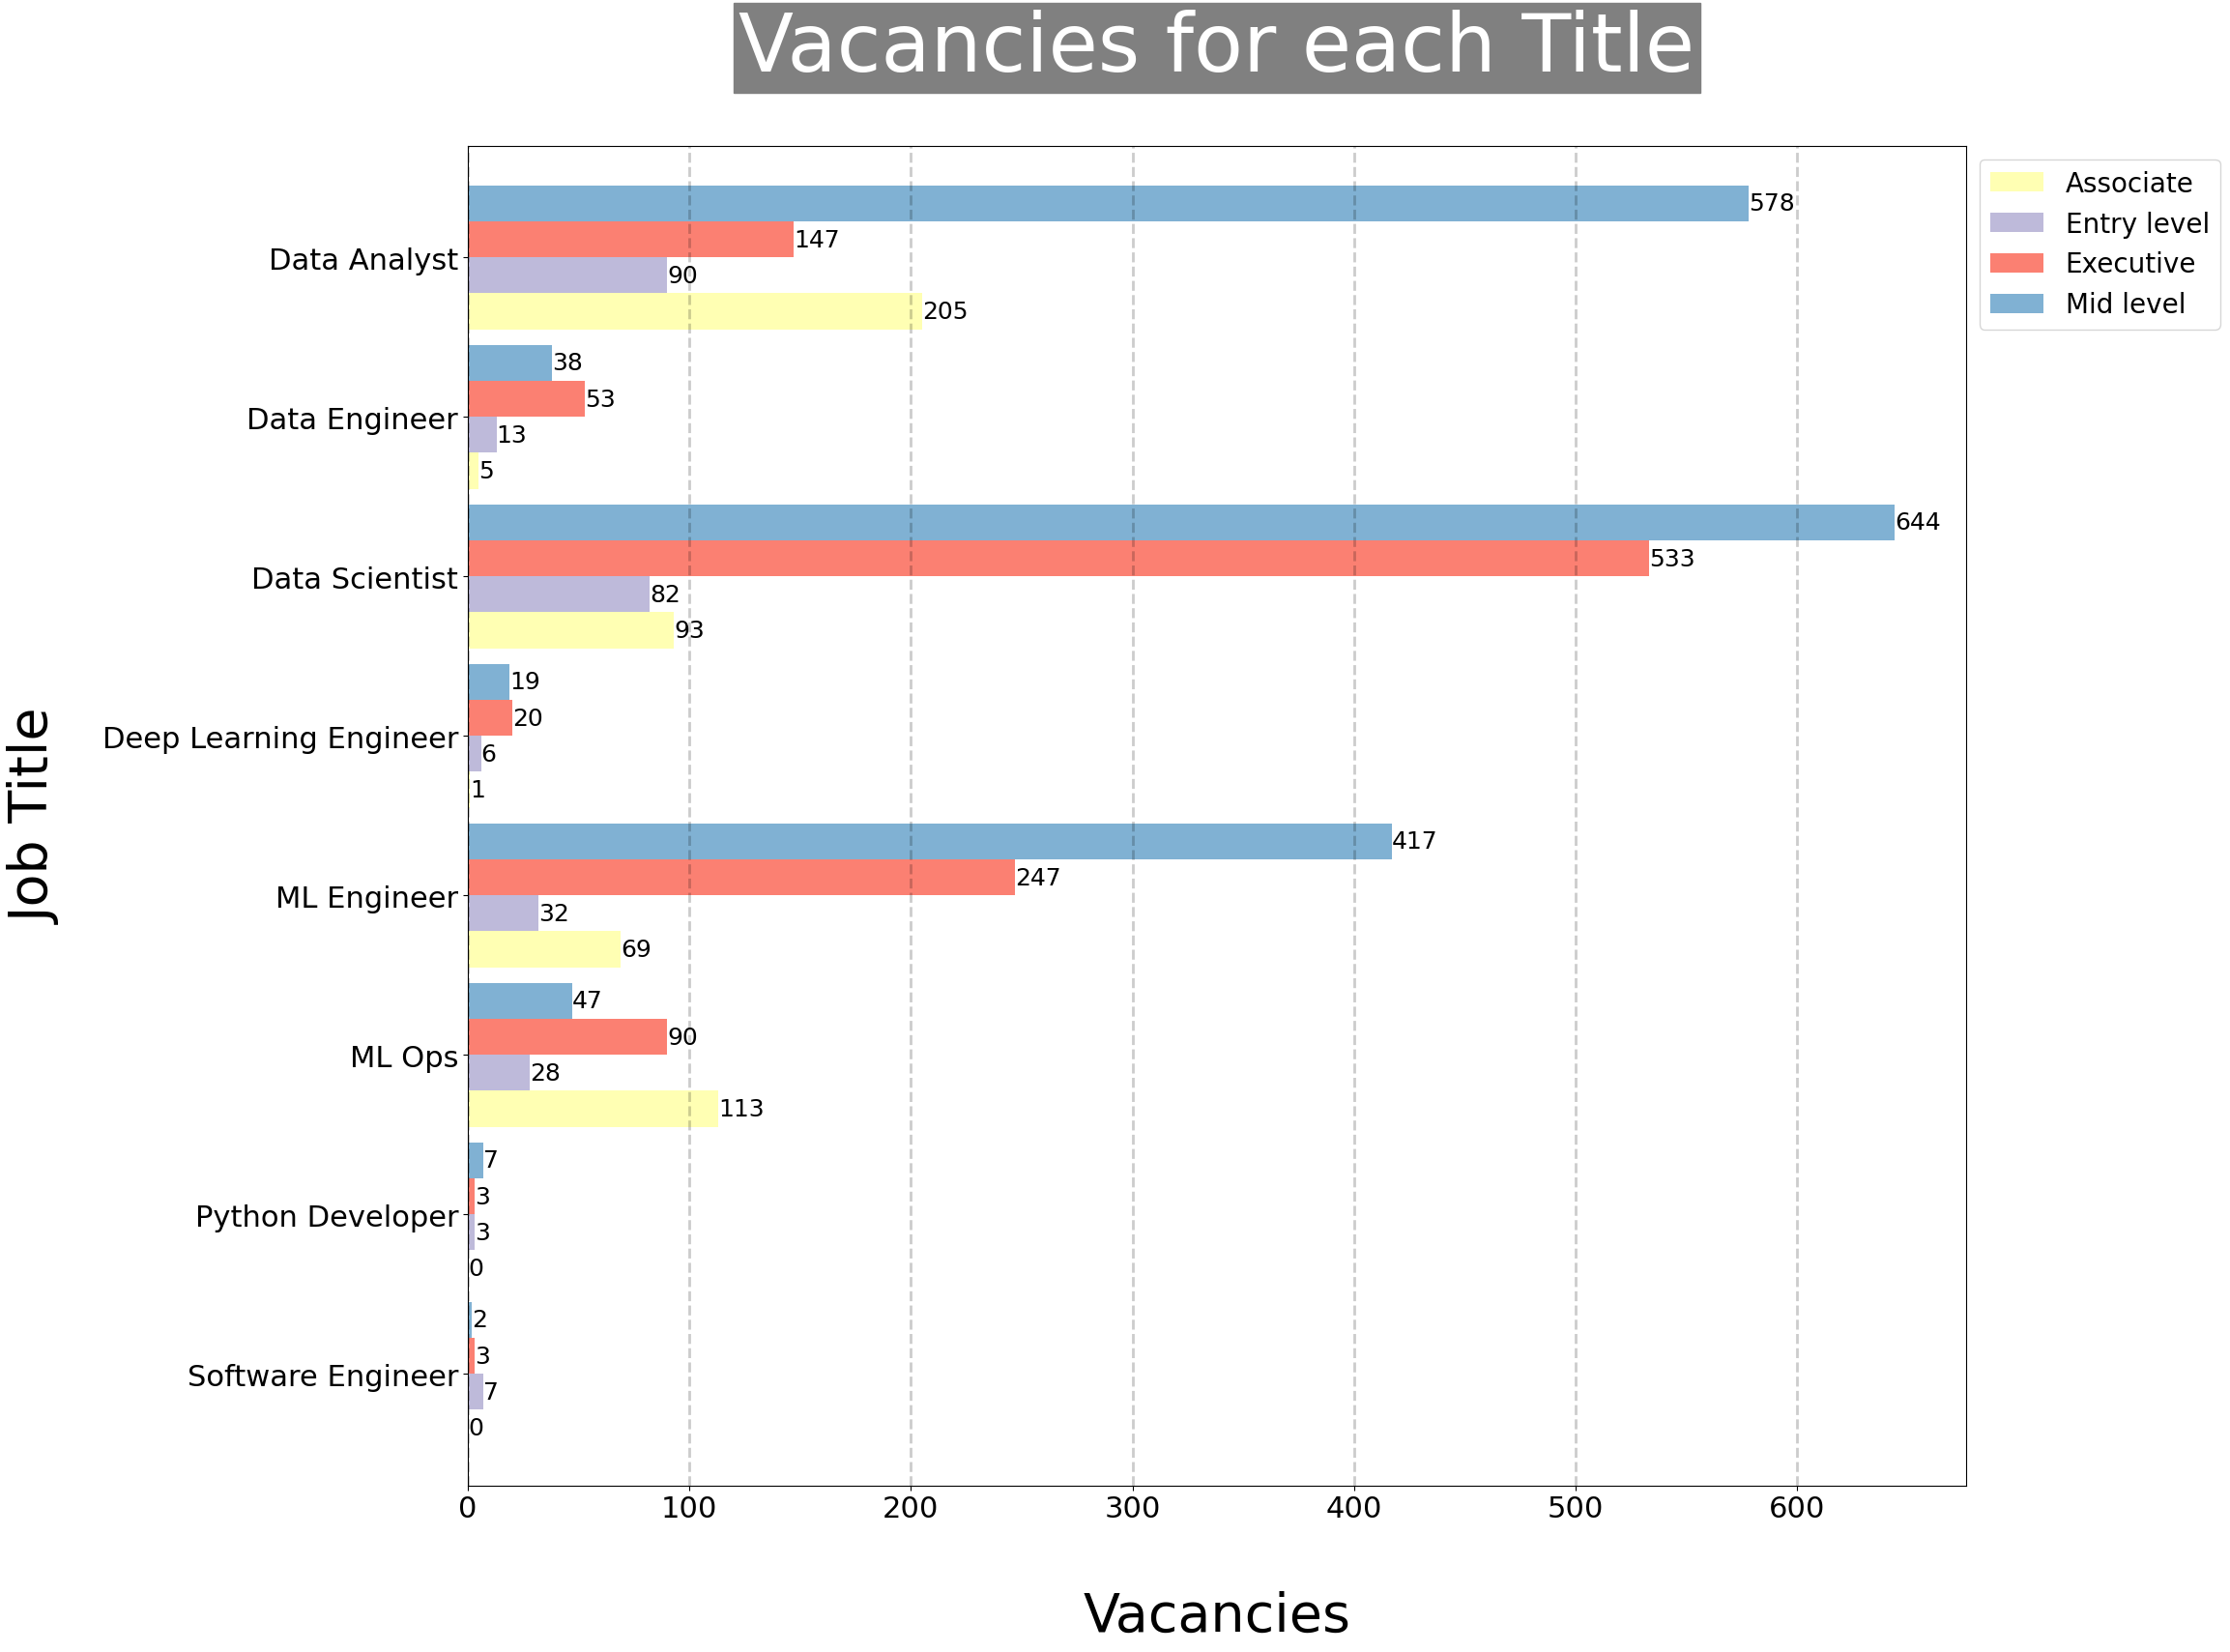

In [29]:
#=============================================================================================================================#
#=========================================  DEFINING A COLORMAP  =============================================================#
#=============================================================================================================================#

# Define a colormap
colormap = plt.cm.get_cmap('Set3')
values = np.arange(10,110,10)

# Normalize the values to range between 0 and 1
normalize = plt.Normalize(vmin=0, vmax=100)

# Create an array of normalized values
normalized_values = normalize(values)

#=============================================================================================================================#
#============================================  PLOTTING GRAPH  ===============================================================#
#=============================================================================================================================#


ax = pivot_table_explevel.plot(kind='barh',stacked=False,width=0.9,
                               figsize=(20,18),fontsize=22,color=colormap(normalized_values))

# Annotations
for container in ax.containers:
    ax.bar_label(container,fontsize=18)
    


plt.title('Vacancies for each Title',fontsize=60,y=1.05,color='white',backgroundcolor='grey')
plt.xlabel('Vacancies',fontsize=40,labelpad=50)
plt.ylabel('Job Title',fontsize=40,labelpad=30)


plt.grid(axis='x',ls='dashed',lw=2,color='black',alpha=0.2)
plt.legend(bbox_to_anchor = (1,1),fontsize=20)

plt.show()

### 2.2 Average Experience required for Each Job Title

In [30]:
job_listings.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range,Experience_level
0,Persistent,data scientist,ML Engineer,WFO,Kolkata,"May 28,2023",May,2023-06-26,5-12 Yrs,5.0,12.0,Not disclosed,Executive
1,Oprable Inc,data scientist,Data Scientist,WFO,Kolkata,"June 24,2023",June,2023-06-26,0-1 Yrs,0.0,1.0,Not disclosed,Entry level
2,Dreambig It Solutions India,data scientist,Data Scientist,WFO,Noida,"June 27,2023",June,2023-06-26,1-6 Yrs,1.0,6.0,Not disclosed,Mid level
3,Axtria,data scientist,Data Analyst,Hybrid,Noida,"June 08,2023",June,2023-06-26,4-9 Yrs,4.0,9.0,Not disclosed,Executive
4,Evalueserve,data scientist,Data Scientist,Hybrid,Gurugram,"June 08,2023",June,2023-06-26,7-10 Yrs,7.0,10.0,Not disclosed,Executive


In [31]:
job_listings['Average_experience'] = (job_listings['Minimum_experience']+job_listings['Maximum_experience'])/2

In [32]:
pivot_table_expavg = round(
    pd.pivot_table(job_listings, values='Average_experience', index='Title',  
                   aggfunc='mean',fill_value=0),
    2)
pivot_table_expavg = pivot_table_expavg.sort_values(by='Title',ascending=False)

In [33]:
pivot_table_expavg

,Average_experience
Title,
Software Engineer,3.12
Python Developer,4.46
ML Ops,5.13
ML Engineer,5.95
Deep Learning Engineer,7.70
Data Scientist,6.07
Data Engineer,6.85
Data Analyst,4.48


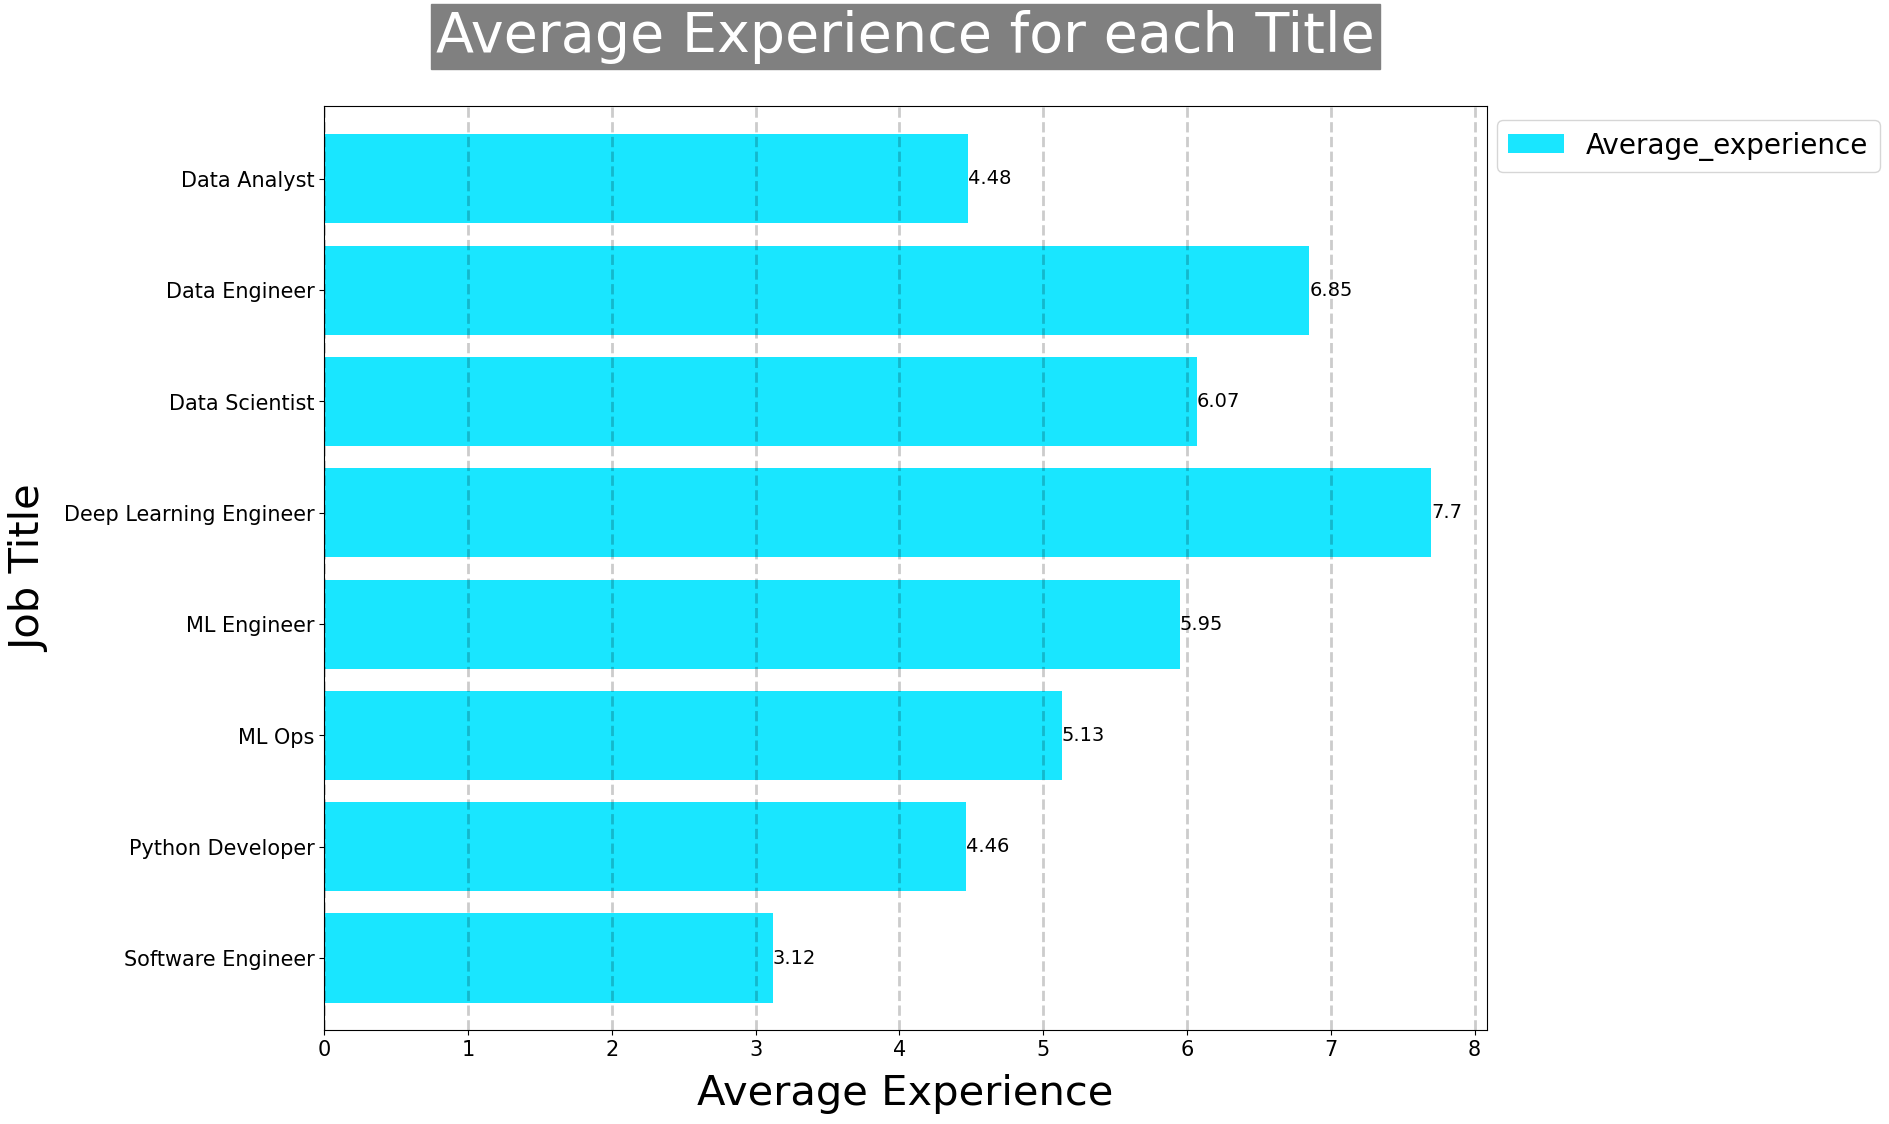

In [34]:
#=============================================================================================================================#
#=========================================  DEFINING A COLORMAP  =============================================================#
#=============================================================================================================================#

# Define a colormap
colormap = plt.cm.get_cmap('cool')
values = np.arange(10,110,10)

# Normalize the values to range between 0 and 1
normalize = plt.Normalize(vmin=0, vmax=100)

# Create an array of normalized values
normalized_values = normalize(values)

#=============================================================================================================================#
#============================================  PLOTTING GRAPH  ===============================================================#
#=============================================================================================================================#


ax = pivot_table_expavg.plot(kind='barh',stacked=False,width=0.8,figsize=(15,12),fontsize=15,color=colormap(normalized_values))

# Annotations
for container in ax.containers:
    ax.bar_label(container,fontsize=14)
    
plt.title('Average Experience for each Title',fontsize=40,y=1.05,color='white',backgroundcolor='grey')
plt.xlabel('Average Experience',fontsize=30,labelpad=10)
plt.ylabel('Job Title',fontsize=30,labelpad=10)


plt.grid(axis='x',ls='dashed',lw=2,color='black',alpha=0.2)
plt.legend(bbox_to_anchor = (1.35,1),fontsize=20)

plt.show()

# ==============

## 3. Work Modes

# ==============

In [35]:
job_listings.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range,Experience_level,Average_experience
0,Persistent,data scientist,ML Engineer,WFO,Kolkata,"May 28,2023",May,2023-06-26,5-12 Yrs,5.0,12.0,Not disclosed,Executive,8.5
1,Oprable Inc,data scientist,Data Scientist,WFO,Kolkata,"June 24,2023",June,2023-06-26,0-1 Yrs,0.0,1.0,Not disclosed,Entry level,0.5
2,Dreambig It Solutions India,data scientist,Data Scientist,WFO,Noida,"June 27,2023",June,2023-06-26,1-6 Yrs,1.0,6.0,Not disclosed,Mid level,3.5
3,Axtria,data scientist,Data Analyst,Hybrid,Noida,"June 08,2023",June,2023-06-26,4-9 Yrs,4.0,9.0,Not disclosed,Executive,6.5
4,Evalueserve,data scientist,Data Scientist,Hybrid,Gurugram,"June 08,2023",June,2023-06-26,7-10 Yrs,7.0,10.0,Not disclosed,Executive,8.5


In [36]:
pd.DataFrame(job_listings['Work_mode'].value_counts())

,Work_mode
WFO,3413
Hybrid,150
Temp.WFH,32


In [37]:
pd.DataFrame(job_listings['Work_mode'].value_counts()).index

Index(['WFO', 'Hybrid', 'Temp.WFH'], dtype='object')

In [38]:
working_modes = list(pd.DataFrame(job_listings['Work_mode'].value_counts()).index)
value_counts = list(pd.DataFrame(job_listings['Work_mode'].value_counts()).values)

records = []

for mode in working_modes:
    modes = mode
    counts = job_listings[(job_listings['Work_mode']==mode)]
    records.append([modes,counts.shape[0]])
    
headers = ['Work_mode','Value_counts']

work_modes = pd.DataFrame(records,columns=headers)
work_modes = work_modes.sort_values(by='Value_counts',ascending=True).reset_index(drop=True)


In [39]:
list(work_modes['Value_counts'])

[32, 150, 3413]

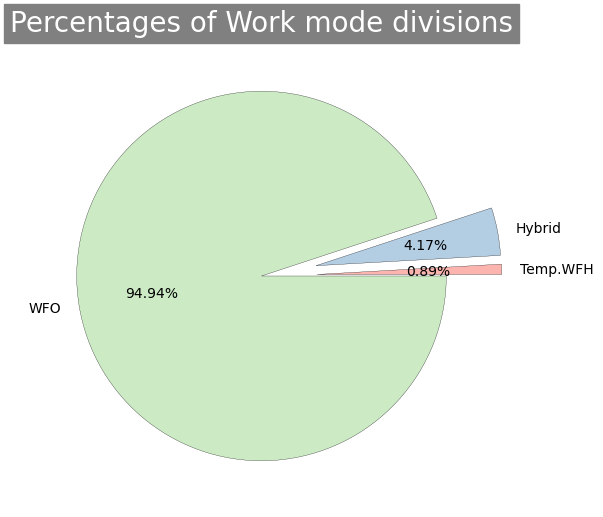

In [40]:
#=============================================================================================================================#
#=========================================  DEFINING A COLORMAP  =============================================================#
#=============================================================================================================================#

# Define a colormap
colormap = plt.cm.get_cmap('Pastel1')
values = np.arange(10,110,10)

# Normalize the values to range between 0 and 1
normalize = plt.Normalize(vmin=0, vmax=100)

# Create an array of normalized values
normalized_values = normalize(values)

#=============================================================================================================================#
#============================================  PLOTTING GRAPH  ===============================================================#
#=============================================================================================================================#


value_counts = list(work_modes['Value_counts'])
label = list(work_modes['Work_mode'])

myexplode = [0.3, 0.3, 0]

fig = plt.figure()
ax = plt.axes()


fig.set_figheight(6)
fig.set_figwidth(6)


plt.pie(value_counts,labels=label,autopct='%1.2f%%',colors=colormap(normalized_values),
       startangle=0,explode=myexplode,
       wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.2,
                      'antialiased': True})

plt.title('Percentages of Work mode divisions',fontsize=20,
          pad=10,color='white',backgroundcolor='grey')


plt.show()

In [41]:
pivot_table_workmode = pd.pivot_table(job_listings, values='Organization', index='Title', columns='Work_mode',
                   aggfunc='count',fill_value=0).sort_values(by='Title',ascending=False)

In [42]:
pivot_table_workmode

Work_mode,Hybrid,Temp.WFH,WFO
Title,,,
Software Engineer,0,0,12
Python Developer,1,0,12
ML Ops,8,0,270
ML Engineer,34,3,728
Deep Learning Engineer,0,0,46
Data Scientist,65,24,1263
Data Engineer,9,1,99
Data Analyst,33,4,983


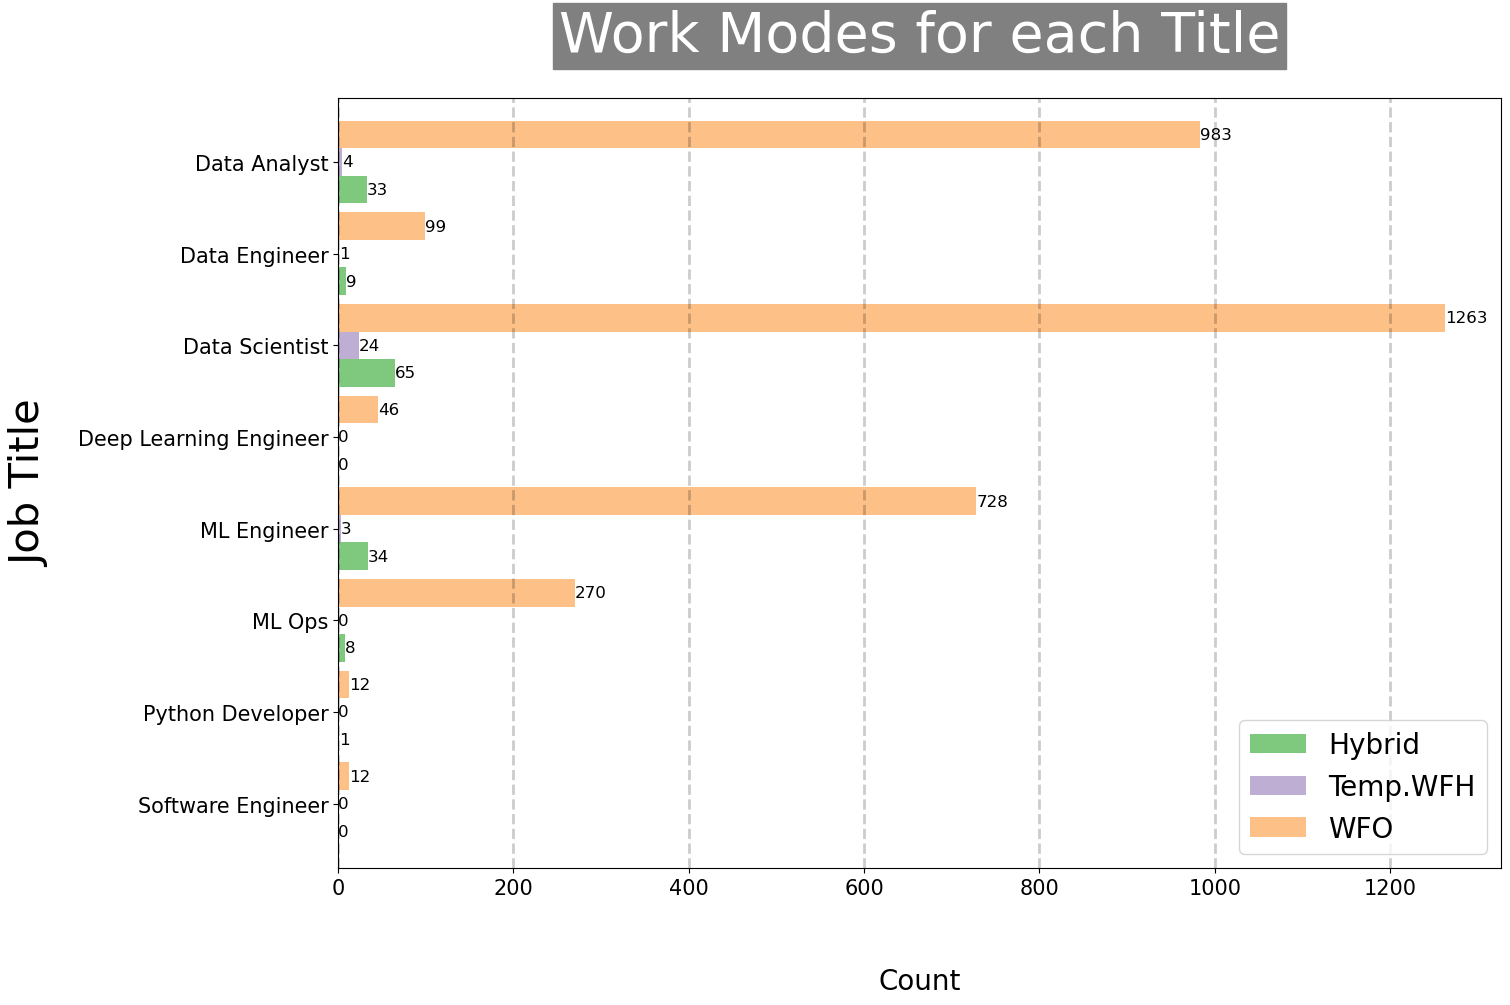

In [43]:
#=============================================================================================================================#
#=========================================  DEFINING A COLORMAP  =============================================================#
#=============================================================================================================================#

# Define a colormap
colormap = plt.cm.get_cmap('Accent')
values = np.arange(10,110,10)

# Normalize the values to range between 0 and 1
normalize = plt.Normalize(vmin=0, vmax=100)

# Create an array of normalized values
normalized_values = normalize(values)


#=============================================================================================================================#
#============================================  PLOTTING GRAPH  ===============================================================#
#=============================================================================================================================#


ax = pivot_table_workmode.plot(kind='barh',stacked=False,width=0.9,
                               figsize=(15,10),fontsize=15,color=colormap(normalized_values))

# Annotations
for container in ax.containers:
    ax.bar_label(container,fontsize=12)
    


plt.title('Work Modes for each Title',fontsize=40,y=1.05,color='white',backgroundcolor='grey')
plt.xlabel('Count',fontsize=20,labelpad=50)
plt.ylabel('Job Title',fontsize=30,labelpad=20)


plt.grid(axis='x',ls='dashed',lw=2,color='black',alpha=0.2)
plt.legend(loc='lower right',fontsize=20)

plt.show()

# ==============

##  4. Salary Ranges

# ==============

In [44]:
job_listings.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range,Experience_level,Average_experience
0,Persistent,data scientist,ML Engineer,WFO,Kolkata,"May 28,2023",May,2023-06-26,5-12 Yrs,5.0,12.0,Not disclosed,Executive,8.5
1,Oprable Inc,data scientist,Data Scientist,WFO,Kolkata,"June 24,2023",June,2023-06-26,0-1 Yrs,0.0,1.0,Not disclosed,Entry level,0.5
2,Dreambig It Solutions India,data scientist,Data Scientist,WFO,Noida,"June 27,2023",June,2023-06-26,1-6 Yrs,1.0,6.0,Not disclosed,Mid level,3.5
3,Axtria,data scientist,Data Analyst,Hybrid,Noida,"June 08,2023",June,2023-06-26,4-9 Yrs,4.0,9.0,Not disclosed,Executive,6.5
4,Evalueserve,data scientist,Data Scientist,Hybrid,Gurugram,"June 08,2023",June,2023-06-26,7-10 Yrs,7.0,10.0,Not disclosed,Executive,8.5


In [45]:
job_listings['Salary_Range'].value_counts()

Not disclosed       3288
20-35 Lacs PA         14
10-20 Lacs PA         13
15-30 Lacs PA         12
15-20 Lacs PA          9
                    ... 
1.75-3.5 Lacs PA       1
15-19 Lacs PA          1
10-16 Lacs PA          1
2.75-5 Lacs PA         1
1.5-3.5 Lacs PA        1
Name: Salary_Range, Length: 133, dtype: int64

In [46]:
job_listings[['Minimum_salary', 'Maximum_salary']] = job_listings['Salary_Range'].str.extract(r'(\d+)-(\d+)')

job_listings[['Minimum_salary', 'Maximum_salary']] = job_listings[['Minimum_salary', 'Maximum_salary']].astype(float)

job_listings['Average_salary'] = (job_listings['Minimum_salary']+job_listings['Maximum_salary'])/2

In [47]:
job_listings.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range,Experience_level,Average_experience,Minimum_salary,Maximum_salary,Average_salary
0,Persistent,data scientist,ML Engineer,WFO,Kolkata,"May 28,2023",May,2023-06-26,5-12 Yrs,5.0,12.0,Not disclosed,Executive,8.5,NaN,NaN,NaN
1,Oprable Inc,data scientist,Data Scientist,WFO,Kolkata,"June 24,2023",June,2023-06-26,0-1 Yrs,0.0,1.0,Not disclosed,Entry level,0.5,NaN,NaN,NaN
2,Dreambig It Solutions India,data scientist,Data Scientist,WFO,Noida,"June 27,2023",June,2023-06-26,1-6 Yrs,1.0,6.0,Not disclosed,Mid level,3.5,NaN,NaN,NaN
3,Axtria,data scientist,Data Analyst,Hybrid,Noida,"June 08,2023",June,2023-06-26,4-9 Yrs,4.0,9.0,Not disclosed,Executive,6.5,NaN,NaN,NaN
4,Evalueserve,data scientist,Data Scientist,Hybrid,Gurugram,"June 08,2023",June,2023-06-26,7-10 Yrs,7.0,10.0,Not disclosed,Executive,8.5,NaN,NaN,NaN


In [48]:
salary_listings = job_listings[~(job_listings['Salary_Range']=='Not disclosed')]

In [49]:
salary_listings.head()

,Organization,Searched_as,Title,Work_mode,Location,Posting_date,Posting_month,Scrapped_Date,Experience,Minimum_experience,Maximum_experience,Salary_Range,Experience_level,Average_experience,Minimum_salary,Maximum_salary,Average_salary
14,Sun Life,data scientist,Data Scientist,WFO,Gurugram,"June 15,2023",June,2023-06-26,5-10 Yrs,5.0,10.0,20-30 Lacs PA,Executive,7.5,20.0,30.0,25.0
36,Tata Consultancy Services (TCS),data scientist,Data Scientist,WFO,Delhi,"May 28,2023",May,2023-06-26,7-12 Yrs,7.0,12.0,"50,000-3 Lacs PA",Executive,9.5,0.0,3.0,1.5
62,M/S Hirelab,data scientist,Data Scientist,WFO,Gurugram,"June 10,2023",June,2023-06-26,3-5 Yrs,3.0,5.0,30-35 Lacs PA,Mid level,4.0,30.0,35.0,32.5
66,Vuca Consulting,data scientist,Data Scientist,WFO,Gurugram,"June 25,2023",June,2023-06-26,8-13 Yrs,8.0,13.0,60-70 Lacs PA,Executive,10.5,60.0,70.0,65.0
74,Bizongo,data scientist,Data Scientist,WFO,Bengaluru,"June 21,2023",June,2023-06-26,9-12 Yrs,9.0,12.0,60-80 Lacs PA,Executive,10.5,60.0,80.0,70.0


In [50]:
pivot_table_salary = round(pd.pivot_table(salary_listings, values='Average_salary', index='Title', aggfunc='mean'),3)
pivot_table_salary

,Average_salary
Title,
Data Analyst,11.242
Data Engineer,14.429
Data Scientist,23.328
Deep Learning Engineer,11.000
ML Engineer,17.587
ML Ops,11.033
Python Developer,17.500


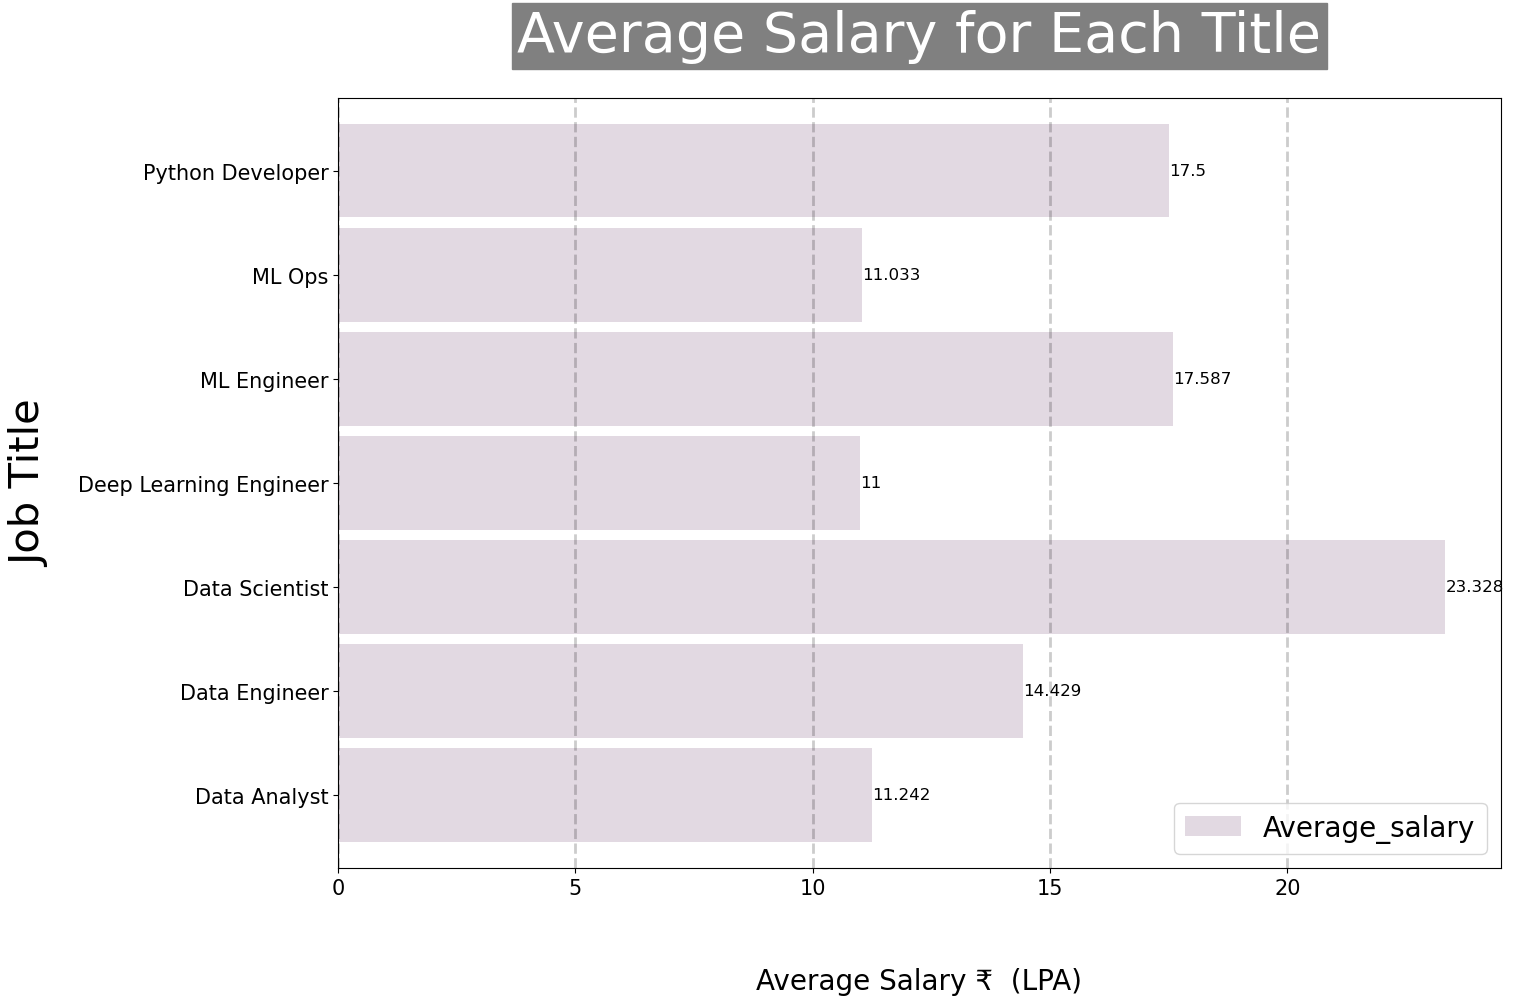

In [51]:
#=============================================================================================================================#
#=========================================  DEFINING A COLORMAP  =============================================================#
#=============================================================================================================================#

# Define a colormap
colormap = plt.cm.get_cmap('twilight')
values = np.arange(10,90,8)

# Normalize the values to range between 0 and 1
normalize = plt.Normalize(vmin=min(values), vmax=max(values))

# Create an array of normalized values
normalized_values = normalize(values)


#=============================================================================================================================#
#============================================  PLOTTING GRAPH  ===============================================================#
#=============================================================================================================================#


ax = pivot_table_salary.plot(kind='barh',stacked=False,width=0.9,
                               figsize=(15,10),fontsize=15,color=colormap(normalized_values))

# Annotations
for container in ax.containers:
    ax.bar_label(container,fontsize=12)
    

plt.title('Average Salary for Each Title',fontsize=40,color='white',backgroundcolor='grey',y=1.05)
plt.xlabel('Average Salary ₹  (LPA)',fontsize=20,labelpad=50)
plt.ylabel('Job Title',fontsize=30,labelpad=20)


plt.grid(axis='x',ls='dashed',lw=2,color='black',alpha=0.2)
plt.legend(loc='lower right',fontsize=20)

plt.show()